In [1]:
from sklearn.metrics import confusion_matrix, classification_report
from scipy.stats import mode
from keras.models import load_model
from keras.utils import to_categorical

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pyttsx3  # require to install espeak (sudo apt/dnf install espeak)

2023-04-14 03:38:38.042830: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-14 03:38:38.839638: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-14 03:38:38.844308: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-14 03:38:45.429266: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
def get_key(dictionary, val):
    for key, value in dictionary.items():
        if val == value:
            return key

In [5]:
characters_df = pd.read_csv('../data/characters.csv')
words_df = pd.read_csv('../data/words.csv')
static_df = pd.read_csv('../data/static.csv')
dynamic_df = pd.read_csv('../data/dynamic.csv')
all_df = pd.read_csv('../data/all.csv')

In [6]:
characters_model = load_model('../models/characters.h5')
words_model = load_model('../models/words.h5')
static_model = load_model('../models/static.h5')
dynamic_model = load_model('../models/dynamic.h5')
all_model = load_model('../models/all.h5')

2023-04-14 04:06:00.899539: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-14 04:06:00.912511: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-14 04:06:00.940166: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

# Characters Test

In [7]:
characters_X = characters_df[['flex_1', 'flex_2', 'flex_3', 'flex_4', 'flex_5', 'GYRx', 'GYRy', 'GYRz', 'ACCx', 'ACCy', 'ACCz']].values
characters_labels = characters_df.iloc[:, -1]
characters_label_dict = {label: i for i, label in enumerate(sorted(set(characters_labels)))}
print(characters_label_dict)
characters_y = np.array([characters_label_dict[label] for label in characters_labels])
characters_y = to_categorical(characters_y, num_classes=len(characters_label_dict))
print(characters_X.shape, characters_y.shape)
characters_X = np.reshape(characters_X, (characters_X.shape[0]//150, 150, characters_X.shape[1]))
characters_y = np.reshape(characters_y, (characters_y.shape[0]//150, 150, characters_y.shape[1]))
print(characters_X.shape, characters_y.shape)

{'a': 0, 'b': 1, 'c': 2, 'd': 3, 'e': 4, 'f': 5, 'g': 6, 'h': 7, 'i': 8, 'j': 9, 'k': 10, 'l': 11, 'm': 12, 'n': 13, 'o': 14, 'p': 15, 'q': 16, 'r': 17, 's': 18, 't': 19, 'u': 20, 'v': 21, 'w': 22, 'x': 23, 'y': 24, 'z': 25}
(975000, 11) (975000, 26)
(6500, 150, 11) (6500, 150, 26)


In [8]:
characters_y_pred = characters_model.predict(characters_X)
characters_predictions = np.argmax(characters_y_pred, axis=2)
print(characters_predictions)
characters_major = mode(characters_predictions, axis=1)[0].squeeze()
characters_count = mode(characters_predictions, axis=1)[1].squeeze()
print(f"Predictions    : {characters_major}")
print(f"Appeared times : {characters_count}")

2023-04-14 04:06:39.218498: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-14 04:06:39.267699: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-14 04:06:39.272929: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

204/204 [==============================] - 11s 36ms/step


2023-04-14 04:06:47.650939: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 101400000 exceeds 10% of free system memory.


[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [25 25 25 ... 25 25 25]
 [25 25 25 ... 25 25 25]
 [25 25 25 ... 25 25 25]]


/tmp/ipykernel_35302/1211437434.py:4: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  characters_major = mode(characters_predictions, axis=1)[0].squeeze()
/tmp/ipykernel_35302/1211437434.py:5: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  characters_count = mode(cha

Predictions    : [ 0  0  0 ... 25 25 25]
Appeared times : [150 150 150 ... 150 150 150]


In [9]:
characters_predictions_list = []
for character in characters_major:
    characters_predictions_list.append(get_key(characters_label_dict, character))
print(characters_predictions_list)

['a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'j', 'j', 'j', 'j', 'j', 'j', 'j', 'j', 'j', 'j', 'k', 'k', 'k', 'k', 'k', 'k', 'k', 'k', 'k', 'k', 'l', 'l', 'l', 'l', 'l', 'l', 'l', 'l', 'l', 'l', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'p', 'p', 'p', 'p', 'p', 'p', 'p', 'p', 'p', 'p', 'q', 'q', 'q', 'q', 'q', 'q', 'q', 'q', 'q', 'q', 'u', 'u', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't',

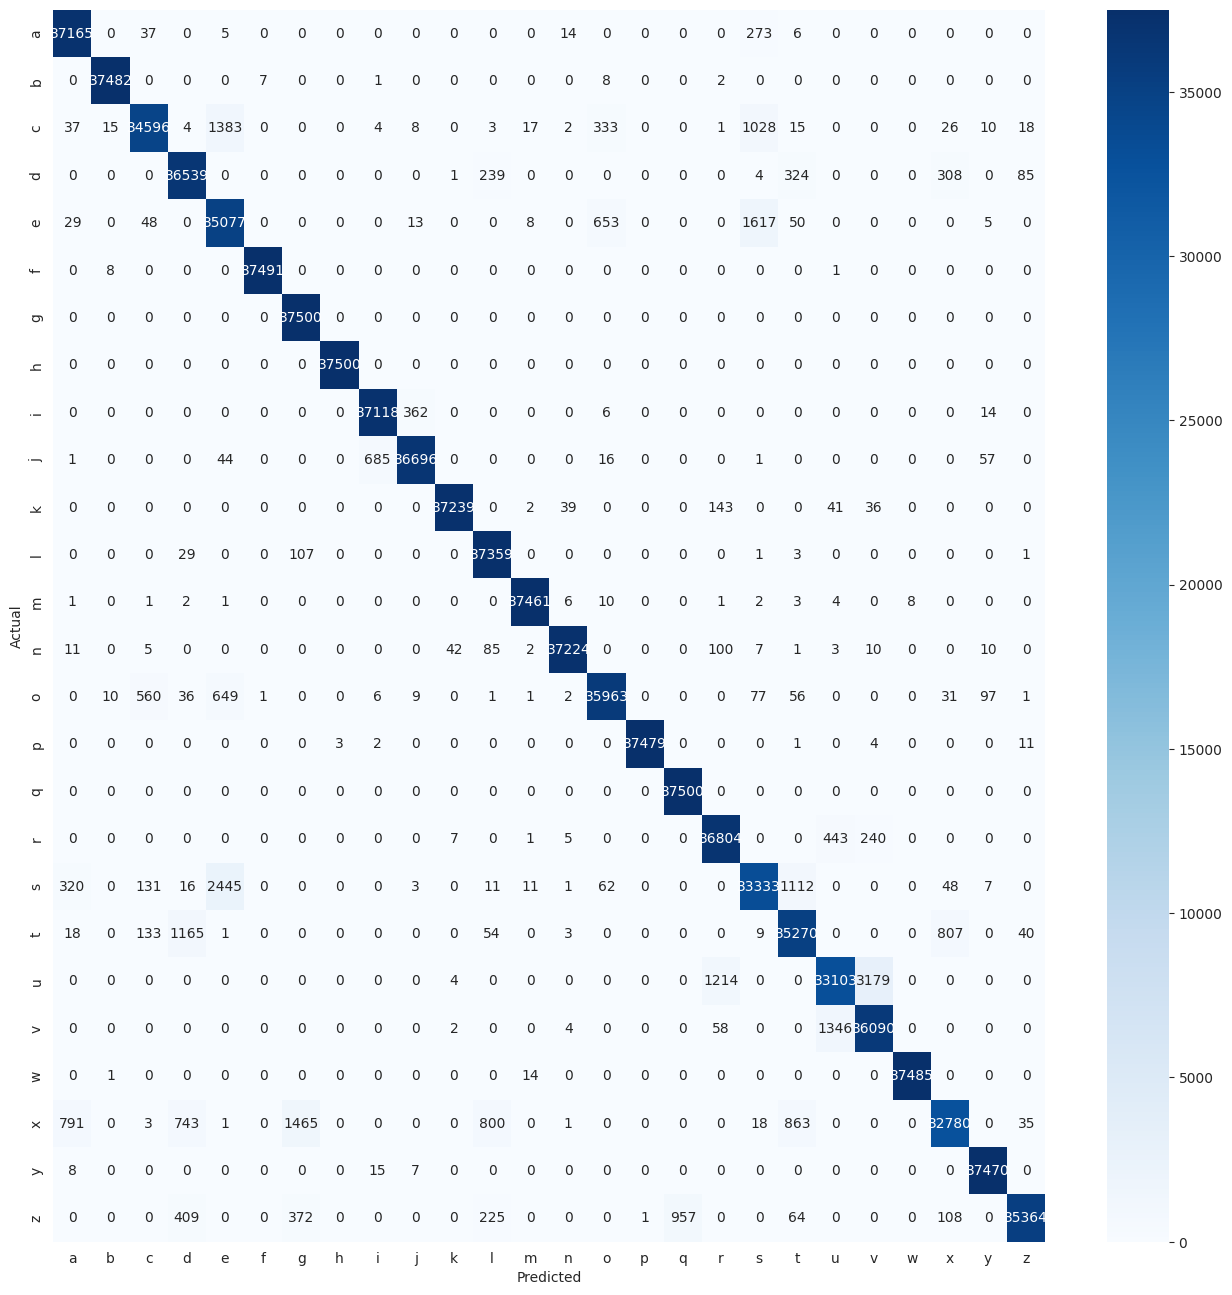

Accuracy: 96.93%


In [10]:
characters_cm = confusion_matrix(characters_y.argmax(axis=2).flatten(), characters_y_pred.argmax(axis=2).flatten())
plt.subplots(figsize=(16, 16))
sns.heatmap(characters_cm, annot=True, cmap='Blues', fmt='g', xticklabels=characters_label_dict.keys(), yticklabels=characters_label_dict.keys())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
accuracy = np.sum(np.diag(characters_cm)) / np.sum(characters_cm)
print(f"Accuracy: {accuracy*100:.2f}%")

In [11]:
print(classification_report(characters_y.argmax(axis=2).flatten(), characters_y_pred.argmax(axis=2).flatten()))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     37500
           1       1.00      1.00      1.00     37500
           2       0.97      0.92      0.95     37500
           3       0.94      0.97      0.96     37500
           4       0.89      0.94      0.91     37500
           5       1.00      1.00      1.00     37500
           6       0.95      1.00      0.97     37500
           7       1.00      1.00      1.00     37500
           8       0.98      0.99      0.99     37500
           9       0.99      0.98      0.98     37500
          10       1.00      0.99      1.00     37500
          11       0.96      1.00      0.98     37500
          12       1.00      1.00      1.00     37500
          13       1.00      0.99      1.00     37500
          14       0.97      0.96      0.96     37500
          15       1.00      1.00      1.00     37500
          16       0.98      1.00      0.99     37500
          17       0.96    

# Words Test

In [ ]:
words_X = words_df[['flex_1', 'flex_2', 'flex_3', 'flex_4', 'flex_5', 'GYRx', 'GYRy', 'GYRz', 'ACCx', 'ACCy', 'ACCz']].values
words_labels = words_df.iloc[:, -1]
words_label_dict = {label: i for i, label in enumerate(sorted(set(words_labels)))}
print(words_label_dict)
words_y = np.array([words_label_dict[label] for label in words_labels])
words_y = to_categorical(words_y, num_classes=len(words_label_dict))
print(words_X.shape, words_y.shape)
words_X = np.reshape(words_X, (words_X.shape[0]//150, 150, words_X.shape[1]))
words_y = np.reshape(words_y, (words_y.shape[0]//150, 150, words_y.shape[1]))
print(words_X.shape, words_y.shape)

In [ ]:
words_y_pred = words_model.predict(words_X)
words_predictions = np.argmax(words_y_pred, axis=2)
print(words_predictions)
words_major = mode(words_predictions, axis=1)[0].squeeze()
words_count = mode(words_predictions, axis=1)[1].squeeze()
print(f"Predictions    : {words_major}")
print(f"Appeared times : {words_count}")

In [ ]:
words_predictions_list = []
for word in words_major:
    words_predictions_list.append(get_key(words_label_dict, word))
print(words_predictions_list)

In [ ]:
words_cm = confusion_matrix(words_y.argmax(axis=2).flatten(), words_y_pred.argmax(axis=2).flatten())
plt.subplots(figsize=(16, 16))
sns.heatmap(words_cm, annot=True, cmap='Blues', fmt='g', xticklabels=words_label_dict.keys(), yticklabels=words_label_dict.keys())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
accuracy = np.sum(np.diag(words_cm)) / np.sum(words_cm)
print(f"Accuracy: {accuracy*100:.2f}%")

In [ ]:
print(classification_report(words_y.argmax(axis=2).flatten(), words_y_pred.argmax(axis=2).flatten()))

# Static Test

In [ ]:
static_X = static_df[['flex_1', 'flex_2', 'flex_3', 'flex_4', 'flex_5', 'GYRx', 'GYRy', 'GYRz', 'ACCx', 'ACCy', 'ACCz']].values
static_labels = static_df.iloc[:, -1]
static_label_dict = {label: i for i, label in enumerate(sorted(set(static_labels)))}
print(static_label_dict)
static_y = np.array([static_label_dict[label] for label in static_labels])
static_y = to_categorical(static_y, num_classes=len(static_label_dict))
print(static_X.shape, static_y.shape)
static_X = np.reshape(static_X, (static_X.shape[0]//150, 150, static_X.shape[1]))
static_y = np.reshape(static_y, (static_y.shape[0]//150, 150, static_y.shape[1]))
print(static_X.shape, static_y.shape)

In [ ]:
static_y_pred = static_model.predict(static_X)
static_predictions = np.argmax(static_y_pred, axis=2)
print(static_predictions)
static_major = mode(static_predictions, axis=1)[0].squeeze()
static_count = mode(static_predictions, axis=1)[1].squeeze()
print(f"Predictions    : {static_major}")
print(f"Appeared times : {static_count}")

In [ ]:
static_predictions_list = []
for word in static_major:
    static_predictions_list.append(get_key(static_label_dict, word))
print(static_predictions_list)

In [ ]:
static_cm = confusion_matrix(static_y.argmax(axis=2).flatten(), static_y_pred.argmax(axis=2).flatten())
plt.subplots(figsize=(16, 16))
sns.heatmap(static_cm, annot=True, cmap='Blues', fmt='g', xticklabels=static_label_dict.keys(), yticklabels=static_label_dict.keys())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
accuracy = np.sum(np.diag(static_cm)) / np.sum(static_cm)
print(f"Accuracy: {accuracy*100:.2f}%")

In [ ]:
print(classification_report(static_y.argmax(axis=2).flatten(), static_y_pred.argmax(axis=2).flatten()))

# Dynamic Test

In [ ]:
dynamic_X = dynamic_df[['flex_1', 'flex_2', 'flex_3', 'flex_4', 'flex_5', 'GYRx', 'GYRy', 'GYRz', 'ACCx', 'ACCy', 'ACCz']].values
dynamic_labels = dynamic_df.iloc[:, -1]
dynamic_label_dict = {label: i for i, label in enumerate(sorted(set(dynamic_labels)))}
print(dynamic_label_dict)
dynamic_y = np.array([dynamic_label_dict[label] for label in dynamic_labels])
dynamic_y = to_categorical(dynamic_y, num_classes=len(dynamic_label_dict))
print(dynamic_X.shape, dynamic_y.shape)
dynamic_X = np.reshape(dynamic_X, (dynamic_X.shape[0]//150, 150, dynamic_X.shape[1]))
dynamic_y = np.reshape(dynamic_y, (dynamic_y.shape[0]//150, 150, dynamic_y.shape[1]))
print(dynamic_X.shape, dynamic_y.shape)

In [ ]:
dynamic_y_pred = dynamic_model.predict(dynamic_X)
dynamic_predictions = np.argmax(dynamic_y_pred, axis=2)
print(dynamic_predictions)
dynamic_major = mode(dynamic_predictions, axis=1)[0].squeeze()
dynamic_count = mode(dynamic_predictions, axis=1)[1].squeeze()
print(f"Predictions    : {dynamic_major}")
print(f"Appeared times : {dynamic_count}")

In [ ]:
dynamic_predictions_list = []
for word in dynamic_major:
    dynamic_predictions_list.append(get_key(dynamic_label_dict, word))
print(dynamic_predictions_list)

In [ ]:
dynamic_cm = confusion_matrix(dynamic_y.argmax(axis=2).flatten(), dynamic_y_pred.argmax(axis=2).flatten())
plt.subplots(figsize=(16, 16))
sns.heatmap(dynamic_cm, annot=True, cmap='Blues', fmt='g', xticklabels=dynamic_label_dict.keys(), yticklabels=dynamic_label_dict.keys())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
accuracy = np.sum(np.diag(dynamic_cm)) / np.sum(dynamic_cm)
print(f"Accuracy: {accuracy*100:.2f}%")

In [ ]:
print(classification_report(dynamic_y.argmax(axis=2).flatten(), dynamic_y_pred.argmax(axis=2).flatten()))

# All Test

In [ ]:
all_X = all_df[['flex_1', 'flex_2', 'flex_3', 'flex_4', 'flex_5', 'GYRx', 'GYRy', 'GYRz', 'ACCx', 'ACCy', 'ACCz']].values
all_labels = all_df.iloc[:, -1]
all_label_dict = {label: i for i, label in enumerate(sorted(set(all_labels)))}
print(all_label_dict)
all_y = np.array([all_label_dict[label] for label in all_labels])
all_y = to_categorical(all_y, num_classes=len(all_label_dict))
print(all_X.shape, all_y.shape)
all_X = np.reshape(all_X, (all_X.shape[0]//150, 150, all_X.shape[1]))
all_y = np.reshape(all_y, (all_y.shape[0]//150, 150, all_y.shape[1]))
print(all_X.shape, all_y.shape)

In [ ]:
all_y_pred = all_model.predict(all_X)
all_predictions = np.argmax(all_y_pred, axis=2)
print(all_predictions)
all_major = mode(all_predictions, axis=1)[0].squeeze()
all_count = mode(all_predictions, axis=1)[1].squeeze()
print(f"Predictions    : {all_major}")
print(f"Appeared times : {all_count}")

In [ ]:
all_predictions_list = []
for word in all_major:
    all_predictions_list.append(get_key(all_label_dict, word))
print(all_predictions_list)

In [ ]:
all_cm = confusion_matrix(all_y.argmax(axis=2).flatten(), all_y_pred.argmax(axis=2).flatten())
plt.subplots(figsize=(16, 16))
sns.heatmap(all_cm, annot=True, cmap='Blues', fmt='g', xticklabels=all_label_dict.keys(), yticklabels=all_label_dict.keys())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
accuracy = np.sum(np.diag(all_cm)) / np.sum(all_cm)
print(f"Accuracy: {accuracy*100:.2f}%")

In [ ]:
print(classification_report(all_y.argmax(axis=2).flatten(), all_y_pred.argmax(axis=2).flatten()))

# Text to sound

In [ ]:
engine = pyttsx3.init()
engine.say(", ".join(characters_predictions_list))
engine.runAndWait()

In [ ]:
engine = pyttsx3.init()
engine.say(", ".join(words_predictions_list))
engine.runAndWait()

In [ ]:
engine = pyttsx3.init()
engine.say(", ".join(static_predictions_list))
engine.runAndWait()

In [ ]:
engine = pyttsx3.init()
engine.say(", ".join(dynamic_predictions_list))
engine.runAndWait()

In [ ]:
engine = pyttsx3.init()
engine.say(", ".join(all_predictions_list))
engine.runAndWait()